In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
#import tensorflow as tf
import seaborn as sns
import getpass
#from tensorflow import keras
import matplotlib as mpl
import statsmodels.api as sm
# consistent plot size wherever not specifiied
from pylab import rcParams
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['axes.grid'] = False
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['axes.labelsize'] = 14

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

from statsmodels.tsa.stattools import adfuller
# # Create the dataset
# data = {
#     'Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
#     'remaining_Age_18': [0.000384593, 0.002850763, 0.005250269, 0.007637753, 0.008903612, 0.012533215, 0.011961653,
#                          0.014693561, 0.020367975, 0.025532819, 0.036877743, 0.041184666, 0.044517376, 0.047773203,
#                          0.064850701, 0.069152822, 0.083427565, 0.088390961],
#     'demands_Age_18': [1737, 41901, 72462, 130019, 149478, 173401, 200854, 252090, 346009, 385810,
#                        465717, 486322, 525802, 434578, 515408, 601615, 753293, 615391]
# }

# # Convert the dataset into a pandas DataFrame
# df = pd.DataFrame(data)

# # Set the 'Year' column as the index
# df.set_index('Year', inplace=True)
# df_no_index=df.reset_index()
# df_no_index['Year']

In [ ]:
import sys
print(sys.path)

import os.path
os.getcwd()

import numpy as np
#import awswrangler as wr
#import tensorflow as tf
#import pydbtools as pydb
#import openpyxl
from math import sqrt
from sklearn.metrics import mean_squared_error
#boto3.setup_default_session(region_name="eu-west-1")
# dataframe opertations - pandas
# plotting data - matplotlib
# time series - statsmodels 
# Seasonality decomposition
# holt winters 
# single exponential smoothing
# double and triple exponential smoothing

# time series - statsmodels

#import tensorflow as tf
import seaborn as sns

#import pmdarima
#from pmdarima import auto_arima

#from tensorflow import keras
import matplotlib as mpl

# consistent plot size wherever not specifiied
from pylab import rcParams
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['axes.grid'] = False
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['axes.labelsize'] = 14

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# grid search sarima hyperparameters
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings


# Forecasting
Forecasting a time series can be broadly divided into two types.

If you use only the previous values of the time series to predict its future values, it is called Univariate Time Series Forecasting.

# ARIMA model:
ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

# p --> AR model lags 
‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 

term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models work best when the predictors are not correlated and are independent of each other.

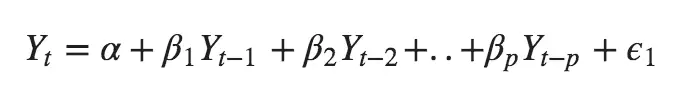

A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’. 


where, Y{t-1} is the lag1 of the series, beta1 is the coefficient of lag1 that the model estimates and `alpha` is the intercept term, also estimated by the model.

# d --> differencing 
d is the number of differencing required to make the time series stationary

In order to make a series stationary, the most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

# q --> MA lags

‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors.

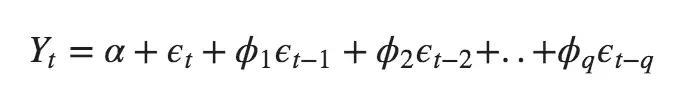

where the error terms are the errors of the autoregressive models of the respective lags. The errors Et and E(t-1) are the errors from the following equations :

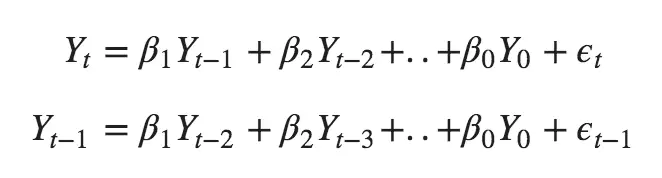

An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms. So the equation becomes:

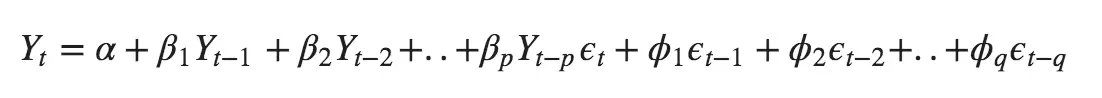

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

The objective, therefore, is to identify the values of p, d and q. 

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.


ref: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/?utm_content=cmp-true


## Stationarity (Differencing and Augmented Dickey-Fuller Test)

For many types of time series models, it’s important to verify that your data is stationary. 
As a quick summary, the data needs to satisfy the following requirements to ensure stationarity:
Constant mean
Constant variance
Constant autocorrelation structure (current value being dependent on past value)
No periodic component

It’s clear from the EDA above that the data does not contain a periodic component, so transformations will not need to be applied to make the data stationary. In this case, we won't apply both a first difference and weekly/monthly/yearly seasonal difference. 

A quick and easy way to verify the data’s stationarity is through the augmented Dickey-Fuller test. This can be done with the following code:

#from statsmodels.tsa.stattools import adfuller
#adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(train)


The null hypothesis (p-value > 0.05) for this test is that the data is not stationary. 
Based on our output from the code above, the p-value was calculated to be ~ 0, 
so we can reject the null hypothesis and 
say that the data is in fact stationary. On to modeling!

Two approaches were taken to determine the ideal SARIMA parameters: 
    Autocorrelation Function (ACF): direct and indirect effect (lag2 -> lag1 -> lag0 and lag2 -->lag0) and
    Partial Autocorrelation Function (PACF): direct effect (lag2 -->lag0) plots, and a grid search. 
    The ACF and PACF plots were used as a starting point to narrow down 
    to a few potential parameters, and then a grid search was used to identify the best parameters. 

The ACF plot can provide answers to the following questions:

Is the observed time series white noise/random?
Is an observation related to an adjacent observation, an observation twice-removed, and so on?
Can the observed time series be modeled with an MA model? If yes, what is the order?


ACF and PACF plots were generated using the following code, and can be seen in Figure below.

Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.



For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

To get idea that what order for the diff model should be used using ACF and PACF

At 12-month (1 year) lag we get significant spike in ACF

Based on ACF, we should start with a seasonal MA process (lag for 12 months)

You can observe that the PACF lag 1 is quite significant since is well above the significance line. The later positive lags turn out to be not significant as the first one, not managing to cross the significance limit (blue region) till lag 12, thus p is 1.

# Find the order of the AR term (p)
The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

But what is ?

Partial autocorrelation (PACF) can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.


So what is the formula for PACF mathematically?

Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.

That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the above equation.

# Finding the number of AR terms?

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

# Finding the number of MA terms?
Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y.

end_datein PACF we see the similar behaviour as ACF


## Coefficients setting:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

## What is ARMA vs ARIMA vs Sarima?
## Generally, the functionalities of these models can be summarized as follow: 
#ARIMA takes into account the past values (autoregressive, moving average) and predicts future values based on that. 
#SARIMA similarly uses past values but also takes into account any seasonality patterns.

#The additional lags are offset by the frequency of seasonality (ex. 12 — monthly, 24 — hourly). 
#SARIMA models allow for differencing data by seasonal frequency, yet also by non-seasonal differencing.
#Knowing which parameters are best can be made easier through automatic parameter search frameworks such as pmdarina.

##   ARMA: Autoregressive + Moving Average. ARIMA: Autoregressive + Moving Average + Trend Differencing. 
## SARIMA: Autoregressive + Moving Average + Trend Differencing + Seasonal Differencing




SARIMA models are ARIMA models with a seasonal component. Per the formula SARIMA(p,d,q)x(P,D,Q,s), the parameters for these types of models are as follows:

p and seasonal P: indicate number of autoregressive terms (lags of the stationarized series)
d and seasonal D: indicate differencing that must be done to stationarize series
q and seasonal Q: indicate number of moving average terms (lags of the forecast errors)
s: indicates seasonal length in the data


As can be seen, there are significant positive spikes in the ACF plot at lag 1 and lag 12 (annual seasonal component) and less signifinicant ones at 4, 5, 7, 8, 20, etc. In the PACF plot, there are significant positive spikes at lags 1, 12 (i.e. lags are slower to decay), less significant spikes at 3, 3.5, 7, 8 etc and less significant negative spikes at 13.



These characteristics suggest a potential parameter starting point of SARIMA(1,1,0)x(1,1,0,12):

p and P both equal 1 (significant positive spikes in ACF and PACF plots)
d and D both equal 1 (first difference and seasonal difference)
q and Q both equal 0 (significant negative spikes, PACF decay is more gradual)
s equal to 12 (annual seasonal component)
Using these parameters, the model was fit to the data, and then a new set of ACF and PACF plots of the model’s residuals was evaluated. See the code below:


The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name 
means that the implementation also supports exogenous variables. 
These are parallel time series variates that are not modeled directly via AR, I, or MA processes, 
but are made available as a weighted input to the model.

Let's improve the model: Using the Rolling Forecast Origin

train_dataso we dont use rolling as it decrease the preformance


## Finding the best parameter the first part:
#model_fit = auto_arima(lim_divorce_data, 
#                       start_p=1, 
#                       max_p=6, 
#                       start_q=1, 
#                       max_q=3, 
#                       seasonal=True, 
#                       trace=True)

#model_fit.summary()

#print(model_fit.order)
#print(model_fit.seasonal_order)

## (Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity)

# Mathematically we can represent the model like this.


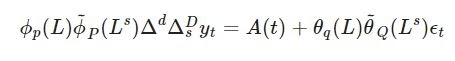

Where

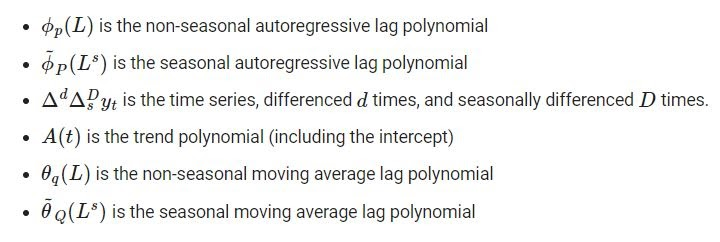

### ref: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
### ref: https://www.statsmodels.org/dev/_modules/statsmodels/tsa/statespace/sarimax.html#SARIMAX
### ref: https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/07/Capture-1.jpg
### ref: https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

In [ ]:

# Read the CSV file
dt = pd.read_csv('historical_demand_daily.csv', parse_dates=['receiptdate'], index_col='receiptdate')

# Create a DataFrame with 'age' and 'demand' columns
lim_lpa = pd.DataFrame(dt[['age', 'demand']]).reset_index()

# Rename columns
lim_lpa_df = lim_lpa.rename(columns={'receiptdate': 'date', 'demand': 'value'})

# Filter for age 18 and sort by date
lim_lpa_df = lim_lpa_df.loc[lim_lpa_df['age'] == 18].sort_values(by=['date'])

# Remove duplicates in the 'date' column
lim_lpa_df = lim_lpa_df.drop_duplicates(subset=['date'])

# Select 'date' and 'value' columns
data = lim_lpa_df[['date', 'value']]

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Set 'date' as index and set frequency to start of the month
df = data.set_index('date').asfreq('MS')
df_full = round(df.fillna(0), 0)
# Print the first and last few rows of the DataFrame
print(df_full.head())
print(df_full.tail())
# data = lim_lpa_df[['date', 'value']].set_index('date')

# ## Set index
# df1=df.reset_index()
# df1['Date'] = str(df1['Year'])
# for y in range(2007,2025):
#     tmpdate = str(y) + '-01-01'
#     df1['Date'].values[y-2007] = pd.to_datetime(tmpdate, format='%Y-%m-%d') #datetime.strptime(tmpdate, '%Y-%m-%d')
# df1  
## Set index
# df1=df.reset_index()
# df1['Date'] = df1['Year']
# for y in range(2007,2025):
#     df1['Date'].values[y-2007] = pd.to_datetime(str(y) + '-01-01')
# df1 = df1.set_index('Date').asfreq('Y')
#df1.set_index('Date')
# df2 = df1.set_index('Date').asfreq('YS')
#df = data.loc[:,~data.columns.duplicated()]
## Select the appropriate variable to be forecasted
# lpa_data = df2['demands_Age_18']
lpa_data = df_full['value']
## infer the frequency of the data:
lpa_data = lpa_data.asfreq(pd.infer_freq(lpa_data.index))

lim_lpa_data = lpa_data#[start_date:end_date]
endog1 = lim_lpa_data
lim_lpa_data
#endog.index
#pd.infer_freq(endog.index)

In [ ]:

## Plotting the ACF and PACF:

Number_of_lags = 12
Max_lags = 17

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(lim_lpa_data, 
                               lags=Max_lags, 
                               ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(lim_lpa_data, 
                                lags=Number_of_lags, 
                                ax=ax[1])
plt.show()

## error band in highlighted 


## Removing the trend which is decreasing and the increasing:
first_diff = lim_lpa_data.diff()[1:] 
# by taking each data point and subtracted 
# the data point from the month that comes prior as it's monthly data 

##Plot
plt.figure(figsize=(24,6))
plt.plot(first_diff)
plt.title('UK Actual Divorce Data (Trend is removed)', fontsize=20)
plt.ylabel('demands', fontsize=16)
for year in range(2007,2025):#,start_date_formatted.year, 
                  #datetime.strptime(end_date, '%Y-%m-%d').year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

## Checking for stationarity, analysing ACF and PACF plots

dftest = adfuller(lim_lpa_data, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation: ", 
      dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

#To know more about the time series stationarity, 
#we can perform the ADfuller test, a test based on hypothesis, 
#where if the p-value is grater than 0.05, then we can consider the time series is non-stationary, 
#and if the P-value is less than 0.05, then the time series is stationary.

###Here we can see that the p-value is greater for our dataset, 
###and we can say that the evidence of the null hypothesis is low; hence the time series is non-stationary.

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(d):
    result=adfuller(d)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

print("The result of adfuller_test(lim_lpa_data): {adfuller_test(lim_lpa_data)}")
dftest = adfuller(first_diff, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation: ", 
      dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
print("The result of adfuller_test(first_diff): {adfuller_test(first_diff)}")


In [ ]:
#>>> From the above tests, we understood that in PACF we have got only one slightly 
first_diff

# Check stationarity: 
- Null Hypothesis: {Ho: It is non stationary, H1: It is stationary}
- Perform the ADfuller test, a test based on hypothesis, where if the p-value is grater than 0.05, then we can consider the time series is non-stationary, and if the P-value is less than 0.05, then the time series is stationary.

# An ARIMA model is characterized by 3 terms: (p, d, q)
1. ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. The term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models work best when the predictors are not correlated and are independent of each other.
2. ‘d’ is the number of differencing required to make the time series stationary. If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced. In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.
3. 

In [ ]:
## This model has hyperparameters that control the nature of 
## the model performed for the series, trend and seasonality, specifically:
## order: A tuple p, d, and q parameters for the modeling of the trend.
## sesonal_order: A tuple of P, D, Q, and m parameters for the modeling the seasonality.
## trend: A parameter for controlling a model of the deterministic trend as one of:
## ‘n’: no trend
## ,’c’: constant
## ,’t’: linear
## ,’ct’: constant with linear trend 
##ref: https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
##ref:https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459

# Size of testing set
number_of_tests = 12

class Sarima_forecast_class:
    """Sarima_forecast_class is a class, which is created for forecasting divorce demands.
    This class tries to make the model robust by relaxing constraints, 
    such as that the data must be stationary and that the MA transform be invertible."""

    def __init__(self, data = lim_lpa_data, n_test = number_of_tests): 
        self.data = data
        self.n_test = n_test

    # split a univariate dataset into train/test sets
    def train_test_split(self, data, n_test):
         # split dataset
        """We can split a list or NumPy array of data using a slice given a specified size of the split, 
        e.g. the number of time steps to use from the data in the test set.The train_test_split() function 
        below implements this for a provided dataset and a specified number of time steps to 
        use in the test set. """
        return data[:-n_test], data[-n_test:]
    
    # one-step sarima forecast
    def sarima_forecast(self, historical_data, config):
        """The function takes an array or list of contiguous prior observations 
    and a list of configuration parameters used to configure the model, 
    specifically two tuples and a string for the trend order, seasonal order trend, and parameter."""
        order, sorder, trend = config
        # define model
        model = SARIMAX(historical_data, 
                        order=order, 
                        seasonal_order=sorder, 
                        trend=trend, 
                        enforce_stationarity=False, 
                        enforce_invertibility=False
                       )
        # fit model
        model_fit = model.fit(disp=False)
        # make one step forecast
        yhat = model_fit.predict(len(historical_data), 
                                 len(historical_data))
        return yhat[0], model, model_fit, order, sorder, trend

    # root mean squared error or rmse
    
    def measure_rmse(self, actual, predicted):
        """After forecasts have been made for each step in the test dataset, 
        they need to be compared to the test set in order to calculate an error score.
        There are many popular error scores for time series forecasting. In this case we 
        will use root mean squared error (RMSE), but you can change this to your preferred 
        measure, e.g. MAPE, MAE, etc.
        The measure_rmse() function below will calculate the RMSE given a list of 
        actual (the test set) and predicted values."""
        return sqrt(mean_squared_error(actual, predicted))

        """Finally, an error score is calculated by comparing all one-step forecasts to 
        the actual test set by calling the measure_rmse() function."""
    # walk-forward validation for univariate data
    def walk_forward_validation(self, data, n_test, cfg):
        """The walk-forward validation scheme is a standard approach to evaluating a time series forecasting model that respects 
        the temporal ordering of observations. 
        First, a provided univariate time series dataset is split into train and test sets 
        using the train_test_split() function. 
        This functions for fitting and evaluating a model repeatedly via 
        walk-forward validation, including splitting a dataset into train 
        and test sets and evaluating one-step forecasts."""
        predictions = list()
        train, test = self.train_test_split(data, n_test)
        """ Then the number of observations in the test set are enumerated. 
        For each we fit a model on all of the history and make a one step forecast. 
        The true observation for the time step is then added to the history and the process is repeated. 
        The sarima_forecast() function is called in order to fit a model and make a prediction.
        """
        # seed historical_data with training dataset
        historical_data = [x for x in train]
        # step over each time-step in the test set
        for i in range(len(test)):
            # fit model and make forecast for historical_data
            yhat = self.sarima_forecast(historical_data, cfg)[0]
            # store forecast in list of predictions
            predictions.append(yhat)
            # add actual observation to historical_data for the next loop
            historical_data.append(test[i])
        # estimate prediction error
        error = self.measure_rmse(test, predictions)
        return error, predictions, historical_data, test, yhat

    # score a model, return None on failure
    def score_model(self, data, n_test, cfg, debug=False):
        """The score_model() function below implements this and returns 
        a tuple of (key and result), where the key is a string version 
        of the tested model configuration."""


    # score a model, return None on failure
    def score_model(self, data, n_test, cfg, debug=False):
        """ """
        result = None
         # convert config to a key
        key = str(cfg)
         # show all warnings and fail on exception if debugging
        if debug:
            result = self.walk_forward_validation(data, n_test, cfg)[0]
        else:
             # one failure during model validation suggests an unstable config
            try:
             # never show warnings when grid searching, too noisy
                with catch_warnings():
                    filterwarnings("ignore")
                    result = self.walk_forward_validation(data, n_test, cfg)[0]
            except:
                error = None
         # check for an interesting result
        if result is not None:
            print(' > Model[%s] %.3f' % (key, result))
                
        return (key, result)

    # grid search configs
    def grid_search(self, data, cfg_list, n_test, parallel=True):
        """a robust framework for grid searching SARIMA model hyperparameters"""
        scores = None
        if parallel:
            # execute configs in parallel
            executor = Parallel(
                n_jobs=cpu_count(), 
                backend='multiprocessing'
            )
            tasks = (delayed(self.score_model)(
                data, 
                n_test, 
                cfg
            ) for cfg in cfg_list
                    )
            scores = executor(tasks)
        else:
            scores = [self.score_model(
                data, 
                n_test, 
                cfg
            ) for cfg in cfg_list]
        # remove empty results
        scores = [r for r in scores if r[1] != None]
        # sort configs by error, asc
        scores.sort(key=lambda tup: tup[1])
        return scores

    # create a set of sarima configs to try
    def sarima_configs(self, seasonal=[0]):
        models = list()
        # define config lists
        p_params = [1, 2] #[0, 1, 2] #[0, 1]
        d_params = [1, 2] #[0, 1]
        q_params = [1, 2] #[0, 1, 2] #[0, 1]
        t_params = ['n','c','t','ct']
        P_params = [0, 1, 2] #[0, 1, 2] #[0, 1]
        D_params = [0, 1]
        Q_params = [0, 1]
        m_params = seasonal
        # create config instances
        for p in p_params:
            for d in d_params:
                for q in q_params:
                    for t in t_params:
                        for P in P_params:
                            for D in D_params:
                                for Q in Q_params:
                                    for m in m_params:
                                        cfg = [
                                            (p, 
                                             d, 
                                             q
                                            ), 
                                            (P,
                                             D,
                                             Q,
                                             m
                                            ),
                                            t
                                        ]
                                        models.append(cfg)
        return models



In [ ]:
## Change this cell from Markdown to code to find the best parameters for SARIMA model:
# Ceate one object of the Sarima_forecast_class class with the default data and the size of testing set
sarima_model = Sarima_forecast_class(lim_lpa_data, number_of_tests)
# model configs
cfg_list = sarima_model.sarima_configs(seasonal = [number_of_tests])
# grid search
scores = sarima_model.grid_search(data=lim_lpa_data,cfg_list=cfg_list,n_test=number_of_tests,parallel=True)#False)
#grid_search(data, cfg_list, n_test, parallel=True)
print('done:  ', scores)
# list top 5 configs:
#  the configurations and the error for the top three configurations are reported. 
# We can see that many models achieve perfect performance on this simple linearly 
# increasing contrived time series problem.
for cfg, error in scores[:5]:
    print(cfg, error)

In [ ]:
# list top 5 configs:
#  the configurations and the error for the top three configurations are reported. 
# We can see that many models achieve perfect performance on this simple linearly 
# increasing contrived time series problem.
for cfg, error in scores[:5]:
    print(cfg, error)
## ‘n’: no trend
## ,’c’: constant
## ,’t’: linear
## ,’ct’: constant with linear trend 
## 5) Data Splitting
## Splitting the available data into three sets: training, validation, and testing. 
    ##a. The model was trained on the training data and 
    ##b. Evaluated and tuned on the validation data. 
    ##c. Once the model is ready for prime time, tested it one final time on the test data.
# Assign the splitted data into training and test sets:
train_data, test_data = sarima_model.train_test_split(
    data = lim_lpa_data, 
    n_test = number_of_tests
)
print('The train data is:', train_data)
print('The test data is:', test_data)

# string representation of list to list using ast.literal_eval()
import ast
# string representation of list to list using strip and split
## make sure to pase the config in ""
ini_list = "[(2, 1, 2), (0, 1, 1, 12), 'n']"#"[(1, 0, 1), (1, 1, 1, 9), 'c']"#"[(1, 0, 1), (1, 1, 0, 9), 'ct']"#"[(0, 0, 0), (1, 1, 0, 9), 'n']"#"[(0, 0, 1), (1, 1, 1, 9), 'n']"#"[(1, 0, 1), (1, 1, 1, 9), 'c']"#"[(0, 0, 1), (1, 1, 1, 9), 'n']"#
 
# printing initialized string of list and its type
print("initial string", ini_list)
print(type(ini_list))
 
# Converting string to list
res = ast.literal_eval(ini_list)
 
# printing final result and its type
print("final list", res)
print(type(res))

optimal_config = res
print(optimal_config)

## Set the optimal parameters based on:
## Option 1: Choose the optimal / best configuration found in the automated program above
## Option 2: Choose the best option based on your expertise from the configurations found in the automated program above
p = getpass.getpass(prompt = """Set the optimal parameters based on:
                    (1: Choose the optimal / best configuration found in the automated program or
                     2: Choose the best option based on your expertise from the configurations found)""")
 
#if (p == '') :
#     print('You would need to enter 1 or 2.') 
#     p = input("""Set the optimal parameters based on:
#                     (1: Choose the optimal / best configuration found in the automated program or
#                      2: Choose the best option based on your expertise from the configurations found)""")
if (p.lower() == '1'):
    config = optimal_config #print(*flattened_list_of_tuples[:1])
elif (p.lower() == '2'):
    config = input("Enter the most optimal configuration of the paprameters: e.g., [(0, 0, 1), (1, 0, 0, 12), 't']:  ")
else:
    config = optimal_config

optimal_config = config

my_order = sarima_model.sarima_forecast(historical_data = train_data, 
                             config = optimal_config)[3]
## order for regular AR:
print("The best order is", my_order)
### (1:AR(seasonal Auto Regrastive), 
### 1:I (integearted=the first-diff was between 1 data point and next) ,
### 2:MA(seasonal MA)
### )

my_seasonal_order = sarima_model.sarima_forecast(historical_data = train_data, 
                             config = optimal_config)[4]
print("The best seasonal order is", my_seasonal_order)

# We found that this config with linear trend ==> 't': linear trend
my_trend = "linear trend"

print("The trend is a ", my_trend)

### (1:AR(seasonal Auto Regrastive), 
### 1:I (integearted) , 
### 1:MA(seasonal MA), 
### 12:monthly)
### )

## trend: A parameter for controlling a model of 
## the deterministic trend of ct, representing we this parameter is constant with linear trend
trend = sarima_model.sarima_forecast(historical_data = train_data, 
                             config = optimal_config)[5]

## define the model:
model = sarima_model.sarima_forecast(historical_data = train_data, 
                             config = optimal_config)[1]

## Fitting the model into time series
model_fit = sarima_model.sarima_forecast(historical_data = train_data, 
                             config = optimal_config)[2]

error, predictions, historical_data, test, yhat = sarima_model.walk_forward_validation(data = lim_lpa_data,
                                                                                       n_test = number_of_tests,
                                                                                       cfg = optimal_config)
print('Root Mean Squared Error:', error)      
print(predictions)   
print(test)   
print(yhat)  

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
https://www.statsmodels.org/dev/_modules/statsmodels/tsa/statespace/sarimax.html#SARIMAX
https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/?utm_content=cmp-true

In [ ]:
#[(2, 1, 2), (0, 1, 1, 12), 'n']